In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Bernoulli Process and Poisson Process

(-0.5, 2000)

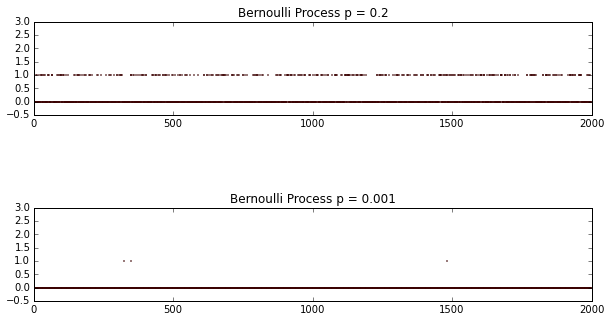

In [88]:
n = 2000

# generate a random Bernoulli process
prob1 = 0.2
x1 = stats.bernoulli.rvs(prob1, size = n)

# generate a random Bernoulli process
prob2 = 0.001
x2 = stats.bernoulli.rvs(prob2, size = n)

# plot the process
fig, ax = plt.subplots(2, 1, figsize=(10,5))
plt.subplots_adjust(hspace = 1)

ax[0].set_title("Bernoulli Process p = " + str(prob1))
ax[0].plot(range(n), x1, 'ro', markersize=1)
ax[0].set_ylim(-0.5, 3)
ax[0].set_xlim(-0.5, n)

ax[1].set_title("Bernoulli Process p = " + str(prob2))
ax[1].plot(range(n), x2, 'ro', markersize=1)
ax[1].set_ylim(-0.5, 3)
ax[1].set_xlim(-0.5, n)

## Intervals

(0, 0.5)

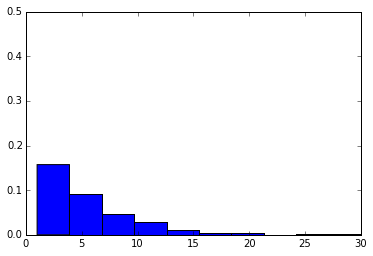

In [94]:
intervals = list()

# generate a random Bernoulli process
prob1 = 0.2
x1 = stats.bernoulli.rvs(prob1, size = n)

tmp_idx = 0
for cur_idx in range(len(x1)):
    
    if x1[cur_idx] == 1:
        intervals.append(cur_idx - tmp_idx)
        tmp_idx = cur_idx
        
#
fig, ax = plt.subplots(1, 1)
ax.hist(intervals, normed=True)
ax.set_ylim(0,0.5)

## Number of success in a Time Intervals (Binomial and Poisson)

(array([ 0.00027237,  0.00077821,  0.00307393,  0.00599222,  0.01019455,
         0.00968872,  0.00552529,  0.00233463,  0.00081712,  0.00023346]),
 array([ 1873. ,  1898.7,  1924.4,  1950.1,  1975.8,  2001.5,  2027.2,
         2052.9,  2078.6,  2104.3,  2130. ]),
 <a list of 10 Patch objects>)

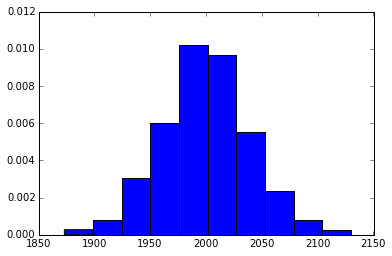

In [100]:
iterations = 1000
prob = 0.2
n = 10000

successNum = list()

for dummyNum in range(iterations):
    x = stats.bernoulli.rvs(prob, size = n)
    successNum.append(sum(x))

successNum = np.array(successNum)

#
fig, ax = plt.subplots(1, 1)
ax.hist(successNum, normed=True)

(array([ 0.16444444,  0.28444444,  0.30222222,  0.19777778,  0.10444444,
         0.04222222,  0.01222222,  0.00111111,  0.        ,  0.00222222]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

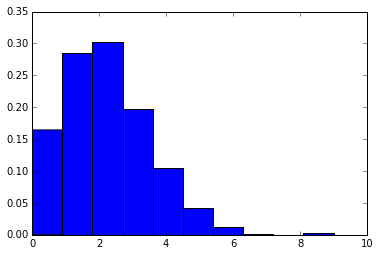

In [105]:
iterations = 1000
prob = 0.0002
n = 10000

successNum = list()

for dummyNum in range(iterations):
    x = stats.bernoulli.rvs(prob, size = n)
    successNum.append(sum(x))

successNum = np.array(successNum)

#
fig, ax = plt.subplots(1, 1)
ax.hist(successNum, normed=True)

(array([ 0.1308,  0.277 ,  0.2724,  0.1803,  0.0877,  0.0358,  0.0115,
         0.0032,  0.0009,  0.0004]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

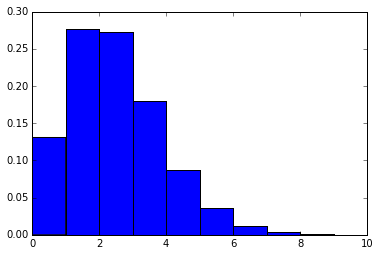

In [108]:
randPoi = stats.poisson.rvs(prob * n, size = n)

#
fig, ax = plt.subplots(1, 1)
ax.hist(randPoi, normed=True)

## Model the Bernoulli Process and Poisson Process using Geometric and Exponential Random variables

In [6]:
n = 10
prob1 = 0.2
intervals = stats.geom.rvs(prob1, size = n)

intervals

array([ 1,  5, 10,  3,  1, 11,  3,  7,  5,  5])

In [10]:
timePoint = range(n)
x1 = []
for idx in range(n):
    x1.append(sum(intervals[0:idx]))

x1 = [sum(intervals[0:idx]) for idx in range(n)]
output = [1 for dummyNum in range(n)]

(0, 1.5)

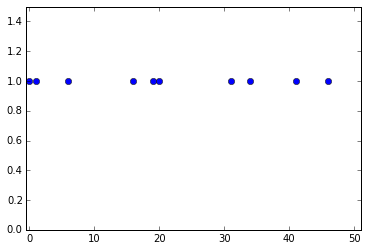

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(x1, output, "o")
ax.set_xlim(-0.5, max(x1)+5)
ax.set_ylim(0, 1.5)

In [21]:
n = 10
prob2 = 0.001
intervals = stats.expon.rvs(prob2, size = n)

intervals

array([ 0.43422457,  1.34176123,  1.5362264 ,  0.45576655,  0.68017109,
        2.27835967,  0.57072868,  0.68679069,  0.40627962,  1.2370785 ])

(0, 1.5)

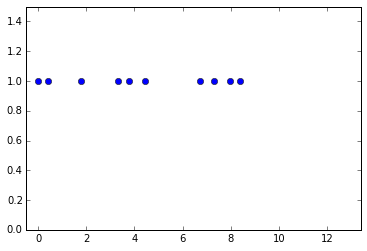

In [22]:
x1 = [sum(intervals[0:idx]) for idx in range(n)]
output = [1 for dummyNum in range(n)]

fig, ax = plt.subplots(1, 1)
ax.plot(x1, output, "o")
ax.set_xlim(-0.5, max(x1)+5)
ax.set_ylim(0, 1.5)

# Gaussian Process

In [128]:
stats.multivariate_normal.rvs(mu, cov, 1)

array([-0.07690642, -1.11896387, -0.14375301,  0.33253773, -0.61556376])

(-5, 5)

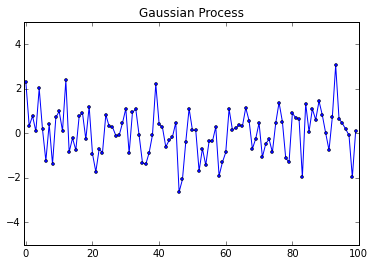

In [142]:
p = 100
n = 1

mu = np.array([0 for dummyNum in range(p)])
cov = np.eye(p)
x = stats.multivariate_normal.rvs(mu, cov, n)

#
plt.subplots_adjust(hspace = 1)
fig, ax = plt.subplots(1, 1)

ax.set_title("Gaussian Process")
ax.plot(range(p), x, '-o', markersize = 3)
ax.set_xlim([-0.5, p])
ax.set_ylim([-5, 5])

In [6]:
def KernelSE(i, j, sigma = 1, L = 1):
    return sigma**2 * np.e ** (- 1/(2*L**2) * (i-j)**2 )

In [23]:
p = 10
sigma = 10
L = 50
COV = np.zeros(shape=(p, p))
for i in range(p):
    for j in range(p):
        COV[i, j] = KernelSE(i, j, sigma=sigma, L=L)

COV

array([[ 100.        ,   99.980002  ,   99.92003199,   99.8201619 ,
          99.68051145,   99.50124792,   99.28258579,   99.02478635,
          98.72815716,   98.39305143],
       [  99.980002  ,  100.        ,   99.980002  ,   99.92003199,
          99.8201619 ,   99.68051145,   99.50124792,   99.28258579,
          99.02478635,   98.72815716],
       [  99.92003199,   99.980002  ,  100.        ,   99.980002  ,
          99.92003199,   99.8201619 ,   99.68051145,   99.50124792,
          99.28258579,   99.02478635],
       [  99.8201619 ,   99.92003199,   99.980002  ,  100.        ,
          99.980002  ,   99.92003199,   99.8201619 ,   99.68051145,
          99.50124792,   99.28258579],
       [  99.68051145,   99.8201619 ,   99.92003199,   99.980002  ,
         100.        ,   99.980002  ,   99.92003199,   99.8201619 ,
          99.68051145,   99.50124792],
       [  99.50124792,   99.68051145,   99.8201619 ,   99.92003199,
          99.980002  ,  100.        ,   99.980002  ,   99

C:\Users\clinton\OneDrive\2_Software_Code\Anaconda3\lib\site-packages\scipy\stats\_multivariate.py:457: RuntimeWarning: covariance is not positive-semidefinite.
  out = np.random.multivariate_normal(mean, cov, size)


(-0.5, 10)

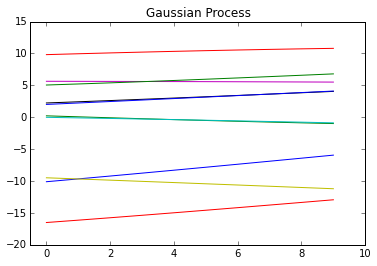

In [24]:
n = 10

mu = np.array([0 for dummyNum in range(p)])
cov = COV
x = stats.multivariate_normal.rvs(mu, cov, n)

#
fig, ax = plt.subplots(1, 1)

ax.set_title("Gaussian Process")
for idx in range(n):
    ax.plot(range(p), x[idx,], '-', markersize = 3)

ax.set_xlim([-0.5, p])
#ax.set_ylim([-5, 5])

In [24]:
x

array([ 8.93365984,  8.98012979,  9.01550141,  9.03977808,  9.05298324])

In [8]:
COV = np.zeros(shape=(3, 3))

Ts = [700, 800, 1029]
sigma = 7
L = 100

for i in range(3):
    for j in range(3):
        #COV[i, j] = sigma**2 * np.e**( -1 / 2 / L**2 * (Ts[i] - Ts[j])**2 )
        COV[i, j] = KernelSE(Ts[i], Ts[j], sigma, L)

COV

array([[ 49.        ,  29.72000233,   0.21866165],
       [ 29.72000233,  49.        ,   3.56003472],
       [  0.21866165,   3.56003472,  49.        ]])

In [9]:
Ts = [700, 800, 1029]
sigma = 7
L = 500

for i in range(3):
    for j in range(3):
        #COV[i, j] = sigma**2 * np.e**( -1 / 2 / L**2 * (Ts[i] - Ts[j])**2 )
        COV[i, j] = KernelSE(Ts[i], Ts[j], sigma, L)

COV

array([[ 49.        ,  48.02973499,  39.46200452],
       [ 48.02973499,  49.        ,  44.12110759],
       [ 39.46200452,  44.12110759,  49.        ]])

In [10]:
Ts = [700, 800, 1029]
sigma = 7
L = 50

for i in range(3):
    for j in range(3):
        #COV[i, j] = sigma**2 * np.e**( -1 / 2 / L**2 * (Ts[i] - Ts[j])**2 )
        COV[i, j] = KernelSE(Ts[i], Ts[j], sigma, L)

COV

array([[  4.90000000e+01,   6.63142888e+00,   1.94313188e-08],
       [  6.63142888e+00,   4.90000000e+01,   1.36530190e-03],
       [  1.94313188e-08,   1.36530190e-03,   4.90000000e+01]])

In [11]:
Ts = [700, 800, 1029]
sigma = 14
L = 100

for i in range(3):
    for j in range(3):
        #COV[i, j] = sigma**2 * np.e**( -1 / 2 / L**2 * (Ts[i] - Ts[j])**2 )
        COV[i, j] = KernelSE(Ts[i], Ts[j], sigma, L)

COV

array([[ 196.        ,  118.8800093 ,    0.87464662],
       [ 118.8800093 ,  196.        ,   14.24013889],
       [   0.87464662,   14.24013889,  196.        ]])

In [13]:
Ts = range(5)
sigma = 7
L = 100

for i in range(3):
    for j in range(3):
        #COV[i, j] = sigma**2 * np.e**( -1 / 2 / L**2 * (Ts[i] - Ts[j])**2 )
        COV[i, j] = KernelSE(Ts[i], Ts[j], sigma, L)

COV

array([[ 49.        ,  48.99755006,  48.99020098],
       [ 48.99755006,  49.        ,  48.99755006],
       [ 48.99020098,  48.99755006,  49.        ]])

In [44]:
np.linalg.cholesky(COV)

array([[  7.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  6.99965001e+00,   6.99982500e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  6.99860014e+00,   1.39982501e-01,   9.89875249e-04,
          0.00000000e+00,   0.00000000e+00],
       [  6.99685071e+00,   2.09931762e-01,   2.96918036e-03,
          1.71431924e-05,   0.00000000e+00],
       [  6.99440224e+00,   2.79825056e-01,   5.93687634e-03,
          6.85618321e-05,   1.83600508e-07]])

In [43]:
p = 5
Ts = range(0, p)
#Ts = [700, 800, 1029]
sigma = 7
L = 100
mu = np.array([0 for dummyNum in range(p)])
COV = np.zeros(shape=(p, p))
for i in range(p):
    for j in range(p):
        COV[i, j] = KernelSE(Ts[i], Ts[j], sigma=sigma, L=L)

x = stats.multivariate_normal.rvs(mu, COV, n)
COV

C:\Users\clinton\OneDrive\2_Software_Code\Anaconda3\lib\site-packages\scipy\stats\_multivariate.py:457: RuntimeWarning: covariance is not positive-semidefinite.
  out = np.random.multivariate_normal(mean, cov, size)


array([[ 49.        ,  48.99755006,  48.99020098,  48.97795496,
         48.96081568],
       [ 48.99755006,  49.        ,  48.99755006,  48.99020098,
         48.97795496],
       [ 48.99020098,  48.99755006,  49.        ,  48.99755006,
         48.99020098],
       [ 48.97795496,  48.99020098,  48.99755006,  49.        ,
         48.99755006],
       [ 48.96081568,  48.97795496,  48.99020098,  48.99755006,  49.        ]])